<h1>WGU D212 TASK 2 REV 6 - MATTINSON</h1>
PCA or General Factor Analysis

## Setup data using continuous features

Import required libraries to get started

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read dataset from .csv file

In [2]:
churn = pd.read_csv('data/churn_clean.csv')

Define continuous features

In [3]:
features=[]
features.append('Children') # Nbr children
features.append('Population') # Population within a mile radius
features.append('Age') # Age of customer
features.append('Income') # Annual income
features.append('Tenure') # Nbr months with service
features.append('Email') # Nbr emails sent to customer
features.append('Contacts') # Nbr times customer contacted support
features.append('Outage_sec_perweek') # Ave seconds/week of system outage
features.append('MonthlyCharge') # customer's monthly charge
features.append('Bandwidth_GB_Year') # ave amount of data used
features.append('Lat') # GPS coordinates of customer residence
features.append('Lng') # GPS coordinates of customer residence
features

['Children',
 'Population',
 'Age',
 'Income',
 'Tenure',
 'Email',
 'Contacts',
 'Outage_sec_perweek',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Lat',
 'Lng']

Create a dataframe of the churn data with numerical values (continuous variables)

In [4]:
df = pd.DataFrame(churn,columns=features)

Explore dataframe

In [5]:
# explore data
print(df.head().round(3).T)
print(df.info())

                            0          1         2          3          4
Children                0.000      1.000     4.000      1.000      0.000
Population             38.000  10446.000  3735.000  13863.000  11352.000
Age                    68.000     27.000    50.000     48.000     83.000
Income              28561.990  21704.770  9609.570  18925.230  40074.190
Tenure                  6.796      1.157    15.754     17.087      1.671
Email                  10.000     12.000     9.000     15.000     16.000
Contacts                0.000      0.000     0.000      2.000      2.000
Outage_sec_perweek      7.978     11.699    10.753     14.914      8.147
MonthlyCharge         172.456    242.633   159.948    119.957    149.948
Bandwidth_GB_Year     904.536    800.983  2054.707   2164.579    271.493
Lat                    56.251     44.329    45.356     32.967     29.380
Lng                  -133.376    -84.241  -123.247   -117.248    -95.807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

## Scale the data

import standard scaler to ensure each variable contributes equally to the analysis

In [6]:
from sklearn.preprocessing import StandardScaler

scale data to ensure each variable contributes equally to the analysis

In [7]:
scaler = StandardScaler()

fit scaler to the data

In [8]:
scaler.fit(df)

StandardScaler()

create scaled dataframe using transformed data

In [9]:
scaled_df = pd.DataFrame(scaler.transform(df), columns = features)
print(scaled_df.head().round(3).T)
print(scaled_df.info())

                        0      1      2      3      4
Children           -0.972 -0.507  0.891 -0.507 -0.972
Population         -0.673  0.048 -0.417  0.285  0.111
Age                 0.721 -1.260 -0.149 -0.245  1.446
Income             -0.399 -0.642 -1.071 -0.741  0.009
Tenure             -1.049 -1.262 -0.710 -0.660 -1.243
Email              -0.666 -0.005 -0.997  0.986  1.317
Contacts           -1.006 -1.006 -1.006  1.018  1.018
Outage_sec_perweek -0.680  0.570  0.252  1.651 -0.623
MonthlyCharge      -0.004  1.630 -0.295 -1.227 -0.528
Bandwidth_GB_Year  -1.138 -1.186 -0.612 -0.562 -1.428
Lat                 3.217  1.025  1.214 -1.065 -1.725
Lng                -2.810  0.432 -2.142 -1.746 -0.332
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  float64
 1   Population          10000 non-null  fl

export scaled data to .CSV file

In [10]:
scaled_df.to_csv('tables\scaled_df.csv', index=False, header=True)

import PCA from sklearn

In [11]:
from sklearn.decomposition import PCA

fit PCA to scaled data

In [12]:
pca = PCA().fit(scaled_df)

Visualize Scree Plot

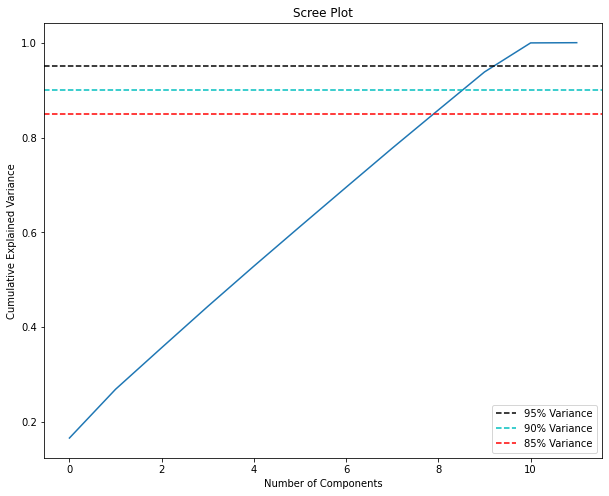

In [13]:
# create scree plot
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Variance')
plt.legend(loc='best')
plt.show()

## Principal Component Algorithm

In [14]:
pca = PCA(n_components=9)
x_pca = pca.fit_transform(scaled_df)

In [15]:
print('Numpy covariance matrix: \n%s' %np.cov(x_pca.T).round(3))

Numpy covariance matrix: 
[[ 1.995  0.     0.     0.    -0.     0.    -0.    -0.    -0.   ]
 [ 0.     1.234 -0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.     1.053  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     1.045 -0.    -0.    -0.    -0.     0.   ]
 [-0.     0.     0.    -0.     1.02  -0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.    -0.     1.002 -0.    -0.    -0.   ]
 [-0.     0.     0.    -0.     0.    -0.     0.994 -0.     0.   ]
 [-0.     0.     0.    -0.     0.    -0.    -0.     0.989 -0.   ]
 [-0.     0.     0.     0.     0.    -0.     0.    -0.     0.967]]


In [16]:
scaled_df.shape

(10000, 12)

In [17]:
x_pca.shape

(10000, 9)

In [18]:
print((pca.explained_variance_ratio_*100).round(3))
print((np.cumsum(pca.explained_variance_ratio_*100).round(3)))

[16.62  10.283  8.771  8.703  8.498  8.349  8.285  8.241  8.06 ]
[16.62  26.903 35.675 44.378 52.876 61.225 69.509 77.751 85.811]


In [19]:
print('Variance explained by principal components = ', 
      sum(pca.explained_variance_ratio_*100).round(3))

Variance explained by principal components =  85.811


In [47]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

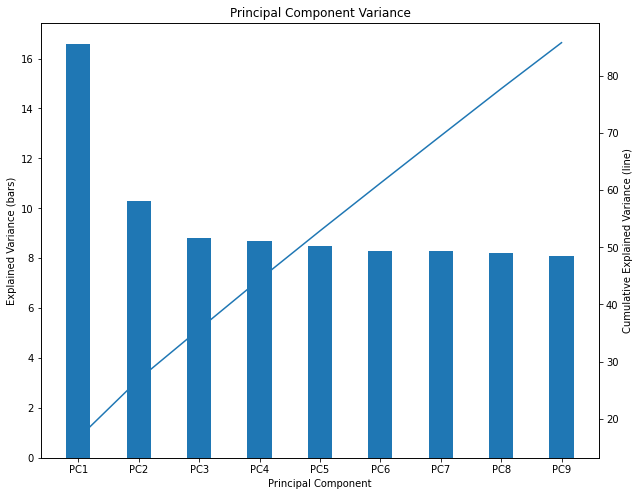

In [59]:
# create principal component variance
#plt.figure(figsize=(10,8))
x = range(1,len(per_var)+1)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
ax1.bar(x, height=per_var, width=0.4, align='center', tick_label=pc_labels)
ax2 = ax1.twinx()
ax2.plot(x, np.cumsum(pca.explained_variance_ratio_*100).round(3))
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (bars)')
ax1.set_title('Principal Component Variance')
ax2.set_ylabel('Cumulative Explained Variance (line)')
plt.show()

## Two-dimensions captured 26.90% of variability

In [22]:
print('Variance explained by the first principal component = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[0])
print('Variance explained by the second principal component = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[1])

Variance explained by the first principal component =  16.619959617488444
Variance explained by the second principal component =  26.90343000331677


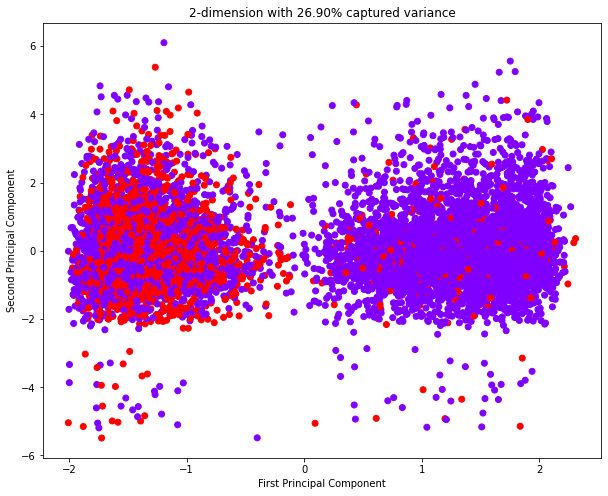

In [23]:
churn['Churn'] = churn['Churn'].map({'Yes': True, 'No': False})
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=churn['Churn'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2-dimension with 26.90% captured variance')
plt.show()

In [24]:
pca.components_.round(3)

array([[ 0.014, -0.001,  0.002,  0.004,  0.705, -0.02 ,  0.004,  0.006,
         0.041,  0.707, -0.023,  0.008],
       [-0.014,  0.653,  0.053, -0.054, -0.009,  0.152,  0.031,  0.009,
        -0.005, -0.011, -0.714,  0.181],
       [ 0.469,  0.14 , -0.486,  0.183,  0.007, -0.047, -0.453, -0.245,
        -0.391,  0.012, -0.028, -0.265],
       [-0.442,  0.332,  0.187, -0.041,  0.028, -0.128,  0.086, -0.138,
        -0.152, -0.001,  0.112, -0.761],
       [ 0.146,  0.125, -0.402, -0.309, -0.025,  0.2  ,  0.021,  0.678,
         0.313,  0.013,  0.075, -0.319],
       [ 0.067,  0.104, -0.145,  0.747, -0.024, -0.421,  0.372,  0.259,
         0.134, -0.007, -0.054, -0.039],
       [ 0.067, -0.075, -0.12 ,  0.032,  0.038,  0.472,  0.618,  0.061,
        -0.602,  0.006,  0.051,  0.006],
       [ 0.057,  0.005,  0.172,  0.48 , -0.011,  0.704, -0.142, -0.171,
         0.389,  0.011,  0.071, -0.186],
       [ 0.376,  0.048,  0.68 ,  0.081,  0.019, -0.035, -0.237,  0.474,
        -0.313, -0.012, 

Create a dataframe of PCs and relationship to the original features

In [25]:
# create pc labels
pc_labels =[]
for i in range(1,len(per_var)+1):
    pc_labels.append('PC'+str(i))

In [26]:
pca_comp = pd.DataFrame(pca.components_,
                columns=features,index=pc_labels)
pca_comp.round(2).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Children,0.01,-0.01,0.47,-0.44,0.15,0.07,0.07,0.06,0.38
Population,-0.00,0.65,0.14,0.33,0.12,0.10,-0.08,0.00,0.05
Age,0.00,0.05,-0.49,0.19,-0.40,-0.14,-0.12,0.17,0.68
Income,0.00,-0.05,0.18,-0.04,-0.31,0.75,0.03,0.48,0.08
Tenure,0.71,-0.01,0.01,0.03,-0.02,-0.02,0.04,-0.01,0.02
Email,-0.02,0.15,-0.05,-0.13,0.20,-0.42,0.47,0.70,-0.04
Contacts,0.00,0.03,-0.45,0.09,0.02,0.37,0.62,-0.14,-0.24
Outage_sec_perweek,0.01,0.01,-0.24,-0.14,0.68,0.26,0.06,-0.17,0.47
MonthlyCharge,0.04,-0.00,-0.39,-0.15,0.31,0.13,-0.60,0.39,-0.31
Bandwidth_GB_Year,0.71,-0.01,0.01,-0.00,0.01,-0.01,0.01,0.01,-0.01


Text(0.5, 1.0, 'Principal Component Matrix')

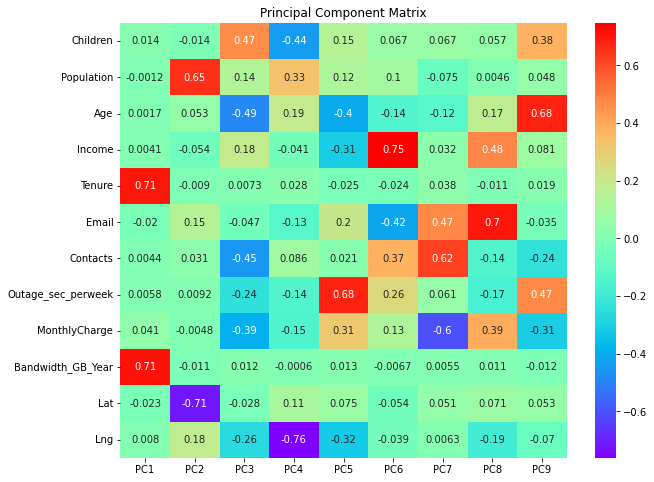

In [27]:
# create principal component matrix
plt.figure(figsize=(10,8))
sns.heatmap(pca_comp.T,cmap='rainbow',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')
